In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the dataset
dataset = pd.read_csv("train.csv")

In [3]:
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

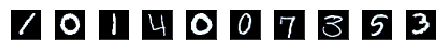

In [5]:
#Visualizing the images
def print_images(images,max_n = 10):
    #set up of figure in inches
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.5)
    i = 0
    while i < max_n:
        #Plotting the images in a matrix of 20x20
        p = fig.add_subplot(20,20,i+1,xticks = [],yticks = [])
        p.imshow(images[i].reshape(28,28), cmap = plt.cm.bone)
        i= i+1
print_images(X,10)
        

In [6]:
#Splitting the data into train-test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
#Checking the dimension og the train and test set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

In [8]:
#Normalizing the values
X_train = X_train/255
X_test = X_test/255

In [9]:
#Importing the keras library
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
#Initializing the NN
model = Sequential()
#Adding the 1st layer
model.add(Dense(units = 397, kernel_initializer = 'uniform', input_dim = 784, activation = 'relu'))
#Adding the 2nd layer
model.add(Dense(units = 203, kernel_initializer = 'uniform', activation = 'relu'))
#Adding the 3rd layer
model.add(Dense(units = 110, kernel_initializer = 'uniform', activation = 'relu'))
#Adding the output layer
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [11]:
#Compling the network
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
#Fitting the model into train_set
history = model.fit(X_train,y_train, batch_size = 30, epochs = 10)

Epoch 1/10
31500/31500 [==============================] - 12s 392us/step - loss: 0.3694 - acc: 0.8855
Epoch 2/10
31500/31500 [==============================] - 12s 373us/step - loss: 0.1329 - acc: 0.9585
Epoch 3/10
31500/31500 [==============================] - 12s 380us/step - loss: 0.0906 - acc: 0.9720
Epoch 4/10
31500/31500 [==============================] - 12s 381us/step - loss: 0.0652 - acc: 0.9792
Epoch 5/10
31500/31500 [==============================] - 12s 383us/step - loss: 0.0499 - acc: 0.9834
Epoch 6/10
31500/31500 [==============================] - 12s 375us/step - loss: 0.0418 - acc: 0.9866
Epoch 7/10
31500/31500 [==============================] - 12s 370us/step - loss: 0.0334 - acc: 0.9892
Epoch 8/10
31500/31500 [==============================] - 12s 376us/step - loss: 0.0284 - acc: 0.9908
Epoch 9/10
31500/31500 [==============================] - 12s 374us/step - loss: 0.0248 - acc: 0.9920
Epoch 10/10
31500/31500 [==============================] - 12s 373us/step - loss: 

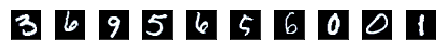

In [13]:
#Visualizing the testdata
print_images(X_test, 10)

In [14]:
#Predicting the output for the test data
y_pred = history.model.predict(X_test)

In [15]:
y_pred.shape

(10500, 10)

In [16]:
a = np.array(y_pred)
a

array([[3.75345532e-09, 5.46088556e-11, 2.20989627e-08, ...,
        2.35133770e-11, 7.76784054e-06, 1.04190578e-04],
       [1.33368845e-08, 3.72094662e-19, 2.46618368e-11, ...,
        2.10366654e-17, 3.91197660e-14, 4.54378944e-19],
       [6.98215184e-12, 7.09870995e-19, 5.59131666e-14, ...,
        2.82991214e-10, 2.16003229e-10, 9.99947309e-01],
       ...,
       [1.60842772e-09, 4.60129268e-10, 4.26692992e-09, ...,
        1.80953563e-09, 1.86256857e-10, 1.44663332e-07],
       [1.00000000e+00, 3.41039004e-28, 5.52853293e-12, ...,
        5.54078875e-12, 2.50819500e-15, 7.01065508e-12],
       [9.86939546e-18, 3.41841122e-22, 9.59357994e-28, ...,
        1.28342343e-22, 3.37484396e-18, 5.36779178e-14]], dtype=float32)

In [17]:
y_pred = np.argmax(a, axis = 1)

In [18]:
y_pred.shape

(10500,)

In [19]:
y[0]

1

In [20]:
#Evaluating the model using RMS value
print('RMS value is:',np.mean((y_pred - y_test)**2))

RMS value is: 0.5437142857142857


3  ,6  ,9  ,5  ,6  ,5  ,6  ,0  ,0  ,1  ,

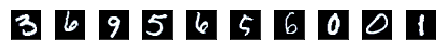

In [21]:
#Visualzing for which digit which value is predicted.
def print_result(x,y,max_n = 0):
    #setting the plot in inches
    fig = plt.figure(figsize = (12,12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.5)
    i = 0
    while i < max_n:
        #plotting the image matrix of 20x20
        p = fig.add_subplot(20,20,i+1, xticks = [], yticks = [])
        p.imshow(x[i].reshape(28,28), cmap =plt.cm.bone)
        print(y[i],' ',end = ',')
        i = i+1
print_result(X_test, y_pred, 10)

In [22]:
#Checking the accuracy of the model using F1_Score
def F1score(ypredict, ytest):
    [tp,tn,fn,fp] = [0,0,0,0]
    for i in range(0,10500): #As there are 250 examples
        if ypredict[i]==1 and ytest[i] == 1:
            tp+=1
        if ypredict[i]==0 and ytest[i]==0:     
            fp+=1
        if ypredict[i] == 1 and ytest[i] == 0:
            tn = tn+1
        if ypredict[i]==0  and ytest[i]==1:
            fn+=1
    return [tp,tn,fp,fn]
result = F1score(y_pred, y_test)
tp = result[0]
tn = result[1] 
fp = result[2]
fn = result[3]
#F1-score is given by
#f1 = 2*precision*recall/(precision+recall)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1 = 2*precision*recall/(precision+recall)
print(F1)

0.6992840095465394
